# Import Libraries

In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import simplekml
from os import listdir
from os.path import isfile, join
import cv2
import numpy
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import imageio
from skimage import img_as_ubyte
##################
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from PIL import ImageTk,Image
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
import skimage
from skimage import data, draw, io
import tkinter as tk
import tkinter.filedialog as fd
from scipy import ndimage as nd
import matplotlib.colors
from matplotlib import pyplot
from  matplotlib import pyplot as plt
import matplotlib as mpl
import cv2
from os import listdir
from os.path import isfile, join
import numpy
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab as plt
import os
from PIL import Image
import csv
from itertools import zip_longest
import matplotlib.colors as colors
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress
import rasterio
import matplotlib.colors as colors
import matplotlib.pyplot as pyplot
import matplotlib.ticker as ticker
import cv2
import glob
from skimage import exposure
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import smtplib
from email.message import EmailMessage
import time
from skimage import io, feature
from scipy import ndimage
import numpy as np
from skimage.registration import phase_cross_correlation
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage.color import hsv2rgb
from skimage.color import rgb2gray
from skimage.exposure import match_histograms
from scipy.ndimage import fourier_shift
from skimage import img_as_ubyte
############33333
import sys
from glob import glob
from osgeo import ogr, gdal
from osgeo import gdalconst
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import seaborn as sns
import geopandas as gpd
#import pycrs
import fiona
from fiona.crs import from_epsg
from shapely.geometry import box
from shapely.geometry import Point
import shapely.geometry as geoms
import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import plotting_extent
from rasterio.plot import show_hist
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio import plot
import rasterstats as rs
#import georasters as gr
#from rastertodataframe import raster_to_dataframe
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
import cmocean
from os import listdir
from os.path import isfile, join
import os
import numpy
from pystackreg import StackReg
from skimage.color import rgba2rgb
from PIL import Image as imo
from scipy.ndimage import shift
from tkinter import * 
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
    NavigationToolbar2Tk)   

# Writing Functions for the GUI Program

In [11]:
#Function to import raw images
def getFolderPath():
    folder_selected = filedialog.askdirectory()
    folderPath.set(folder_selected)

#Function to perform Image Enhancement and plot image historgrams    
def doStuff():
    w1=int(wx1.get())
    w2=int(wx2.get())
    h1=int(hy1.get())
    h2=int(hy2.get())
    mypath = folderPath.get()
    print("strat working on folder", mypath)
    
    #Setup Folder directories
    
    if not os.path.exists('filter_daily_images_classified'):
        os.makedirs('filter_daily_images_classified')
    if not os.path.exists('save_filteredFigs'):
        os.makedirs('save_filteredFigs')
      
    maskedpath=r"filter_daily_images_classified"
    onlyfiles = [f for f in sorted(os.listdir(mypath)) if isfile(join(mypath, f))]
    output_dir=r"save_filteredFigs"
    
    for n in range(0, len(onlyfiles)):
        
        def convertScale(img, alpha, beta):
            """Add bias and gain to an image with saturation arithmetics. 
            """

            new_img = img * alpha + beta
            new_img[new_img < 0] = 0
            new_img[new_img > 255] = 255
            return new_img.astype(np.uint8)
        
        file = str(onlyfiles[n])
        position = file.index(".jpg")
        filename = file[0:position]
        file_first = str(onlyfiles[0])
        position_first = file.index(".jpg")
        filename_first = file[0:position_first]
        clip_hist_percent=1
        fili = join(mypath, onlyfiles[n])
        image = cv2.imread(fili)
        mask1=cv2.imread('masks/1.jpg')
        mask2=cv2.imread('masks/2.jpg')
        mask3=cv2.imread('masks/3.jpg')
        mask4=cv2.imread('masks/4.jpg')
        
        image = cv2.bitwise_and(image, ~mask1)
        img_originalgray=cv2.cvtColor(image[h1:h2, w1:w2], cv2.COLOR_BGR2GRAY)
        hist1_original = cv2.calcHist([img_originalgray],[0],None,[256],[0,256])
        img_yuv = cv2.cvtColor(image[h1:h2, w1:w2], cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        gray_heq = cv2.cvtColor(img_output, cv2.COLOR_BGR2GRAY)
        hist2_eq = cv2.calcHist([gray_heq],[0],None,[256],[0,256])
     # Calculate grayscale histogram

        hist2 = cv2.calcHist([gray_heq],[0],None,[256],[0,256])
        hist_size = len(hist2)
     # Calculate cumulative distribution from the histogram
        accumulator = []
        accumulator.append(float(hist2[0]))
        for index in range(1, hist_size):
            accumulator.append(accumulator[index -1] + float(hist2[index]))
     # Locate points to clip
        maximum = accumulator[-1]
        clip_hist_percent *= (maximum/100.0)
        clip_hist_percent /= 2.0
     # Locate left cut
        minimum_gray = 0
        while accumulator[minimum_gray] < clip_hist_percent:
            minimum_gray += 1
     # Locate right cut
        maximum_gray = hist_size -1
        while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
            maximum_gray -= 1
     # Calculate alpha and beta values
        alpha = 255 / (maximum_gray - minimum_gray)
        beta = -minimum_gray * alpha
        #alpha = 1.5 # Contrast control (1.0-3.0)
        #beta = -15 # Brightness control (0-100)
        auto_result = convertScale(img_output, alpha=alpha, beta=beta)
        auto_result_gray = cv2.cvtColor(auto_result, cv2.COLOR_BGR2GRAY)
    # Calculate new histogram with desired range and show histogram 
        hist2_auto = cv2.calcHist([auto_result_gray],[0],None,[256],[minimum_gray,maximum_gray])
        print('alpha', alpha)
        print('beta', beta)
        filteredimage = exposure.equalize_adapthist(auto_result, kernel_size=128, clip_limit=0.01, nbins=256)
        img = exposure.rescale_intensity(filteredimage, out_range=(0, 255)).astype(np.uint8)
        filteredimage = exposure.equalize_adapthist(img, kernel_size=128, clip_limit=0.01, nbins=256)
        img = exposure.rescale_intensity(filteredimage, out_range=(0, 255)).astype(np.uint8)
        img = cv2.bitwise_and(img, ~mask1[h1:h2, w1:w2])
        img = cv2.bitwise_and(img, ~mask2[h1:h2, w1:w2])
        img = cv2.bitwise_and(img, ~mask3[h1:h2, w1:w2])
        img = cv2.bitwise_and(img, ~mask4[h1:h2, w1:w2])
        gray_filtered = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ###############################
    # Calculate grayscale histogram
        hist3 = cv2.calcHist([gray_filtered],[0],None,[256], [0,256])
       
       ###########################
        label = (maskedpath+ '//' + str(filename) + '.jpg')
        
        #### Reapply Mask and crop
          #Read mask image
        mask1=cv2.imread('masks/1.jpg')
        mask2=cv2.imread('masks/2.jpg')
        mask3=cv2.imread('masks/3.jpg')
        mask4=cv2.imread('masks/4.jpg')
        imageio.imwrite('mask1_cropped.jpg',~mask1[h1:h2, w1:w2] )
        imageio.imwrite('mask2_cropped.jpg',~mask2[h1:h2, w1:w2] )
        imageio.imwrite('mask3_cropped.jpg',~mask3[h1:h2, w1:w2] )
        imageio.imwrite('mask4_cropped.jpg',~mask4[h1:h2, w1:w2] )

    # Mask input image with binary mask
        result1 = cv2.bitwise_and(img, ~mask1[h1:h2, w1:w2])
        result2 = cv2.bitwise_and(result1, ~mask2[h1:h2, w1:w2])
        result3 = cv2.bitwise_and(result2, ~mask3[h1:h2, w1:w2])
        result3 = cv2.bitwise_and(result3, ~mask4[h1:h2, w1:w2])
        label = (maskedpath+ '//' + str(filename) + '.jpg')
        print('image dimensions', img.shape)
        imageio.imwrite(label,result3 )
        print (filename)
        import matplotlib.gridspec as gridspec
        fig = plt.figure(constrained_layout=True, figsize=(10,10), dpi=300)
        gs = gridspec.GridSpec(3, 2, figure=fig)
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[1, 0])
        ax4 = fig.add_subplot(gs[1, 1])
        ax5 = fig.add_subplot(gs[2, :])
        ax1.imshow(image[h1:h2, w1:w2])
        ax2.imshow(img_output)
        ax3.imshow(auto_result)
        ax4.imshow(result3)
        ax1.set_title("Original: " + str(filename))
        ax2.set_title("HistEq-OpenCV: " +str(filename))
        ax3.set_title("Filter_Auto: " + str(filename))
        ax4.set_title("Filter CLAHE: " + str(filename))
        ax5.plot(hist3, '-', color='r', label='CLAHE')
        ax5.plot(hist2_auto, '-', color='g', label='Automatic Global Brithness/Contrast Adjustment')
        ax5.plot(hist2_eq, '-', color='b', label="Histogram Equalization(OpenCV)")
        ax5.plot(hist1_original, '-' , color='k', label='Original Histogram')
        ax5.legend()
        ax5.set_xlim([10,256])
        ax5.set_ylim([0,8000])
        ax1.axes.set_aspect('equal')
        ax2.axes.set_aspect('equal')
        ax3.axes.set_aspect('equal')
        ax4.axes.set_aspect('equal')
        ax1.yaxis.set_tick_params(rotation=90)
        ax2.yaxis.set_tick_params(rotation=90)
        ax3.yaxis.set_tick_params(rotation=90)
        ax4.yaxis.set_tick_params(rotation=90)
        ax5.yaxis.set_tick_params(rotation=0)
        fig.suptitle("Image Enhancement process")
        fig.set_size_inches(10, 10)
        # fig.tight_layout()
        plt.savefig(output_dir + '//' + filename + '.jpg', dpi=300, bbox_inches='tight')
        plt.show()

        if not os.path.exists('save_filteredFigs/gif_dir'):
            os.makedirs('save_filteredFigs/gif_dir')
        
        gif_dir=r'save_filteredFigs/gif_dir'

        jpg_dir =output_dir
        images = []
        for file_name in sorted(os.listdir(jpg_dir)):
            if file_name.endswith('.jpg'):
                file_path = os.path.join(jpg_dir, file_name)
                images.append(imageio.imread(file_path))
        imageio.mimsave(gif_dir+'/movie.gif', images, duration=1)

    print("Task is completed")
    
#Function to import enhanced images
def getFolderStaticChangeDetection():
    folder_selected = filedialog.askdirectory()
    folderPath.set(folder_selected)

def StaticChangeDetection():
     #setup folder directories
    if not os.path.exists('ChangeDetection_Figs/gif_dir'):
        os.makedirs('ChangeDetection_Figs/gif_dir')
        
    gif_dir=r'ChangeDetection_Figs/gif_dir'
    
    if not os.path.exists('ChangeDetection_Figs'):
        os.makedirs('ChangeDetection_Figs')
     
    output_dir = r"ChangeDetection_Figs"
    
    mypath_main = folderPath.get()
    
    onlyfiles = [f for f in listdir(mypath_main) if isfile(join(mypath_main, f))]
    
    print("woring with folder", mypath_main)
    
    print('Static Change Detection program is processing images')
    x1=[]
    y1=[]
    z1=[]
    for n in range(0, len(onlyfiles)):
        
        fili=  join(mypath_main,onlyfiles[n])
        fili_ref =  join(mypath_main,onlyfiles[n+1])
        image1 = cv2.imread(fili,1)
        image2 = cv2.imread(fili_ref,1)
         #### Reapply Mask and crop
          #Read mask image
        mask1=cv2.imread('mask1_cropped.jpg')
        
        mask2=cv2.imread('mask2_cropped.jpg')
        
        mask3=cv2.imread('mask3_cropped.jpg')
        
        mask4=cv2.imread('mask4_cropped.jpg')

        mask1g=cv2.imread('mask1_cropped.jpg', 0)
        
        mask2g=cv2.imread('mask2_cropped.jpg', 0)
        
        mask3g=cv2.imread('mask3_cropped.jpg', 0)
        
        mask4g=cv2.imread('mask4_cropped.jpg', 0)
        
    # Mask input image with binary mask
        image1= cv2.bitwise_and(image1, mask1)
        image1= cv2.bitwise_and(image1, mask2)
        image1= cv2.bitwise_and(image1, mask3)
        image1= cv2.bitwise_and(image1, mask4)
        image2= cv2.bitwise_and(image2, mask1)
        image2= cv2.bitwise_and(image2, mask2)
        image2= cv2.bitwise_and(image2, mask3)
        image2= cv2.bitwise_and(image2, mask4)

        imggray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        imggray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

        #Image Alignment step 1 using pystackreg affine transform
        #Registration of the two images: image2 to image1
        sr = StackReg(StackReg.AFFINE)
        imggray2 = sr.register_transform(imggray1, imggray2)
       
        
        # Image Alignment step 1 using phase-crrelation
        #Registration of the two images: image2 to image1
        shifts, error, phasediff = phase_cross_correlation(imggray1, imggray2, upsample_factor=20)
        
        imggray2 = shift(imggray2, shift=(shifts[0], shifts[1]), mode='constant')
        
        print ('shift:',shifts, 'phasediff:', phasediff, 'error:', error )
        #convert images to float32 format and peform simple Image Differencing
        a = np.float32(imggray1)
        a= np.asarray(a)
        b = np.float32(imggray2)
        b=np.asarray(b)
        difference = cv2.subtract(a, b)
        
         ##############Creating Image Title and labels based on YYYYDDMM and HHmm

        file_fili = str(onlyfiles[n])
        position = file_fili.index(".jpg")
        filename1 = file_fili[0:position]
        mm= ( filename1[20]+filename1[21])
        hh= ( filename1[18]+filename1[19])
        DD= ( filename1[16]+filename1[17])
        MM= ( filename1[14]+filename1[15])
        YYYY= ( filename1[10]+filename1[11]+filename1[12]+filename1[13])
        fili_datelabel1= ("YYYYMMDD"+ ": " + YYYY+MM+DD+"-HHMM"+": "+hh+mm)
        file_fili_ref = str(onlyfiles[n+1])
        position = file_fili_ref.index(".jpg")
        filename2 = file_fili_ref[0:position]
        mm_r= ( filename2[20]+filename2[21])
        hh_r= ( filename2[18]+filename2[19])
        DD_r= ( filename2[16]+filename2[17])
        MM_r= ( filename2[14]+filename2[15])
        YYYY_r= ( filename2[10]+filename2[11]+filename2[12]+filename2[13])
        fili_datelabel2= ("YYYYMMDD"+ ": " + YYYY_r+MM_r+DD_r+"-HHMM"+": "+hh_r+mm_r)

        ####convert dates to number of days in the year     
        YMD= YYYY_r+MM_r+DD_r
        date2 = pd.to_datetime(YMD, format='%Y%m%d')
        new_year_day = pd.Timestamp(year=date2.year, month=1, day=1)
        day_of_the_year_filref = (date2 - new_year_day).days + 1
        if n==0:  
            YMD_i= YYYY+MM+DD
            datei = pd.to_datetime(YMD_i, format='%Y%m%d')
            new_year_day = pd.Timestamp(year=datei.year, month=1, day=1)
            initial_date = (datei - new_year_day).days + 1

        cummulative_days_change= day_of_the_year_filref - initial_date
        print ("cummulative_days_change since the day of first processed image: " + str(cummulative_days_change))
        print ("day_of_the_year_filref: " + str(day_of_the_year_filref))
        print (fili_datelabel1)
        print (fili_datelabel2)
    
        ##### calculate number of days between images
        YMD_1= YYYY+MM+DD
        date1 = pd.to_datetime(YMD_1, format='%Y%m%d')
        new_year_day1 = pd.Timestamp(year=datei.year, month=1, day=1)
        initial_date1 = (date1 - new_year_day1).days + 1
    
    ####
    
        Delta_DD= int(day_of_the_year_filref)-int(initial_date1)
    
        print('Delta_DD: '+ str(Delta_DD))
    
###################################

        date_start = fili.find("Mt_Meager_")
        date_end = date_start + 18
        fili_date = fili[date_start:date_end] 
        date_start = fili_ref.find("Mt_Meager_")  #Mt_Meager_20201202200120.jpg
        date_end = date_start + 18
        fileref_date = fili_ref[date_start:date_end]
        filolabel = ("Change _%s_%s" % (fili_datelabel1, fili_datelabel2))
        filo=  ("Pixel-Change: %s_%s" % (fili_date, fileref_date))
        filo_out=  str(fili_date) + str(fileref_date)

        col1=[fili_date]
        col2=[fileref_date]
        col3=[filo]
        x1.append(col1)
        y1.append(col2)
        z1.append(col3)

        print(fili_date)
        print(fileref_date)
        print (filo)

        print("###################################################################################")

        #Exporting Names of processed images into a CSV file
        d = [x1, y1, z1]
        export_data = zip_longest(*d, fillvalue = '')
        with open('Processed_Images.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
              wr = csv.writer(myfile)
              wr.writerow(("fili_date", "fileref_date", "filo"))
              wr.writerows(export_data)
        myfile.close()
        
        #Perform structural similarity between the images
        
        mssim, grad, S = ssim(imggray1, imggray2, gradient=True, full=True, use_sample_covariance=True)
        print("Structural simiarity Index score: ",mssim)
        
        # S represents the similarity map
        new_img_const=S
        sm_min= S.min()
        sm_max= S.max()
        mind=difference.min()
        maxd=difference.max()
        
        #Calculating Mean Square error, Images with Geometrical distortion
        mse_const = mean_squared_error(imggray1, imggray2)
        ssim_const = mssim
        
        ############################### Normalizing colormaps to creating Figure
        norm1 = mpl.colors.Normalize(vmin=0,  vmax=sm_max)
        bounds = np.linspace(0, 0.75 , 10)
        norm1 = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
        normd=colors.TwoSlopeNorm(vmin=mind, vcenter=1, vmax=maxd)
        
        #########Plotting Results and Making Figure
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 3), dpi=300, sharex=True, sharey=True)
        ax = axes.ravel()
        #fig.subplots_adjust(left = 0.9, right = 1.2, top = 1.2, bottom = 0.9)
    
        divider = make_axes_locatable(ax[2])
        cax2 = divider.append_axes('right', size='3%', pad=0.05)
    
        divider = make_axes_locatable(ax[3])
        cax3 = divider.append_axes('right', size='3%', pad=0.05)
    
        label = 'MSE: {:.2f}, Structural Similarity Indices Mean-SSIM: {:.2f}'
        labeldf= 'MSE: {:.2f}, SSIM for difference image and similarity image: {:.2f}'
        im0= ax[0].imshow(image1)
        ax[0].set_title(fili_datelabel1+" Index: "+ str(cummulative_days_change), fontsize=5)
        im1= ax[1].imshow(image2)
        ax[1].set_title(fili_datelabel2, fontsize=5)
        ##fig.colorbar(ax[2].imshow(difference, cmap=cmocean.cm.diff, norm = colors.TwoSlopeNorm(vmin=mind, vcenter=0, vmax=maxd) ), ax=ax[2],cax=cax2, orientation='vertical')
        #percentage_diff
        ax[2].imshow(image2)
        difference[mask1g==0]=np.nan
        difference[mask2g==0]=np.nan
        difference[mask3g==0]=np.nan
        difference[mask4g==0]=np.nan
        cb2=fig.colorbar(ax[2].imshow(difference, cmap=cmocean.cm.balance, norm =normd, alpha=1), extend='both', ax=ax[2],cax=cax2, orientation='vertical', 
        ticks=[-250,-200,-150,-100,-50,1,50,100,150,200,250])

        cb2.ax.set_yticklabels(['-250','-200','-150','-100','-50','1','50','100','150','200','250'], fontsize=3)
        
        ax[2].set_title(fili_date+":"+fileref_date, fontsize=5)
        cb2.set_label('Change-in-pixel', labelpad=2, y=0.5, rotation=90, fontsize=3, fontweight='bold', color='blue')
        #nipy_spectral
        ax[3].imshow(image2)
        S[mask1g==0]=np.nan
        S[mask2g==0]=np.nan
        S[mask3g==0]=np.nan
        S[mask4g==0]=np.nan
        cb3=fig.colorbar(ax[3].imshow(S, cmap='jet', norm=norm1, alpha=0.7), ax=ax[3], cax=cax3, orientation='vertical', ticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.75])
        cb3.ax.set_yticklabels(['0','0.1','0.2','0.3','0.4','0.5','0.6','0.75'], fontsize=3)
        ax[3].set_xlabel(label.format(mse_const, ssim_const), fontsize=4)
        ax[3].set_title(fili_date+":"+fileref_date, fontsize=5)
        cb3.set_label('Similaritry Map:1=No-Change', labelpad=1, y=0.5, rotation=90, fontsize=3, fontweight='bold', color='blue')
        ax[1].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
        ax[1].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500]))
        ax[0].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
        ax[0].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500])) 

        ax[2].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
        ax[2].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500])) 
        
        ax[3].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
        ax[3].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500])) 
        

        ax[0].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=2)
        ax[0].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=2)
        ax[1].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=2)
        ax[1].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=2)

        ax[2].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=2)
        ax[2].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=2)
        ax[3].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=2)
        ax[3].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=2)


    
        ax[0].set_xlim(0, 830)
        ax[1].set_xlim(0, 830)
        ax[2].set_xlim(0, 830)
        ax[3].set_xlim(0, 830)
        ax[0].axes.set_aspect('equal')
        ax[1].axes.set_aspect('equal')
        ax[2].axes.set_aspect('equal')
        ax[3].axes.set_aspect('equal')
      
     
        fig.tight_layout()
       
        
        plt.savefig(output_dir + '//' + filo_out + '.png', dpi=300)

        plt.show()


        jpg_dir =output_dir
        images = []
        for file_name in sorted(os.listdir(jpg_dir)):
            if file_name.endswith('.png'):
                file_path = os.path.join(jpg_dir, file_name)
                images.append(imageio.imread(file_path))
        imageio.mimsave(gif_dir+'/movie.gif', images, duration=1)

        if n==len(onlyfiles)-2:
            break

    print("Task is completed")

#Function to import Enhanced images for dynamic change detection      
def getFolderPath_DynamicChangeDetection():
    folder_selected = filedialog.askdirectory()
    folderPath.set(folder_selected)
    
#Function to Perform Dynamic Change Detection   
def DynamicChangeDetection():
     #setting the folder directories
    mypath_main = folderPath.get()
    if not os.path.exists('Results_OpticalFlow'):
        os.makedirs('Results_OpticalFlow')
    if not os.path.exists('Results_OpticalFlow/gif_dir'):
        os.makedirs('Results_OpticalFlow/gif_dir')
    if not os.path.exists( 'flow_xn'):
        os.makedirs( 'flow_xn')
    if not os.path.exists( 'flow_yn'):
        os.makedirs( 'flow_yn')
    output_dirflowxn=r"flow_xn"
    output_dirflowyn=r"flow_yn"
    output_dir = r"Results_OpticalFlow"
    gif_dir= r'Results_OpticalFlow/gif_dir'
    onlyfiles = [f for f in listdir(mypath_main) if isfile(join(mypath_main, f))]
    print("working with folder", mypath_main)
    
    print(' Dynamic Change Detection program just started')
    x1=[]
    y1=[]
    z1=[]
    for n in range(0, len(onlyfiles)):
        
        fili=  join(mypath_main,onlyfiles[n])
        fili_ref =  join(mypath_main,onlyfiles[n+1])
        fili_ref2 =  join(mypath_main,onlyfiles[n+2])
        image1 = cv2.imread(fili,1)
        image2 = cv2.imread(fili_ref,1)
        image3 = cv2.imread(fili_ref2,1)
        
        #### Reapply Mask and crop
          #Read mask image
        mask1=cv2.imread('mask1_cropped.jpg')
        mask2=cv2.imread('mask2_cropped.jpg')
        mask3=cv2.imread('mask3_cropped.jpg')
        mask4=cv2.imread('mask4_cropped.jpg')
        mask1g=cv2.imread('mask1_cropped.jpg', 0)
        mask2g=cv2.imread('mask2_cropped.jpg', 0)
        mask3g=cv2.imread('mask3_cropped.jpg', 0)
        mask4g=cv2.imread('mask4_cropped.jpg', 0)
        
    # Mask input image with binary mask
        image1= cv2.bitwise_and(image1, mask1)
        image1= cv2.bitwise_and(image1, mask2)
        image1= cv2.bitwise_and(image1, mask3)
        image1= cv2.bitwise_and(image1, mask4)
        image2= cv2.bitwise_and(image2, mask1)
        image2= cv2.bitwise_and(image2, mask2)
        image2= cv2.bitwise_and(image2, mask3)
        image2= cv2.bitwise_and(image2, mask4)
        image3= cv2.bitwise_and(image3, mask1)
        image3= cv2.bitwise_and(image3, mask2)
        image3= cv2.bitwise_and(image3, mask3)
        image3= cv2.bitwise_and(image3, mask4)
        #Convert RGB to Gray image
        imggray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        imggray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        imggray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
        #Convert gray images to float32 format and reapply mask to gray images
        im3= np.float32(imggray3)
        im1 = np.float32(imggray1)
        im2 = np.float32(imggray2)
        im1[mask1g==0]=0
        im1[mask2g==0]=0
        im1[mask3g==0]=0
        im1[mask4g==0]=0
        im2[mask1g==0]=0
        im2[mask2g==0]=0
        im2[mask3g==0]=0
        im2[mask4g==0]=0
        im3[mask1g==0]=0
        im3[mask2g==0]=0
        im3[mask3g==0]=0
        im3[mask4g==0]=0
        
        #step 1 Image Alignment
         # Registration of the two images: image2 to image1
        shifts12, error, phasediff = phase_cross_correlation(im1, im2, upsample_factor=20, overlap_ratio=3)
        from scipy.ndimage import shift
        im2 = shift(im2, shift=(shifts12[0], shifts12[1]), mode='constant', prefilter=True)
        
        print ('shift:im1 and im2',shifts12, 'phasediff:', phasediff, 'error:', error )
        
        #step 2 Image Alignement
        # Registration of the two images: image3 to image1
        shifts13, error, phasediff = phase_cross_correlation(im2, im3, upsample_factor=20, overlap_ratio=3)
        im3 = shift(im3, shift=(shifts13[0], shifts13[1]), mode='constant', prefilter=True)
        print ('shift:im1 and im3',shifts13, 'phasediff:', phasediff, 'error:', error )
        
        #Reapply mask
        im1[mask1g==0]=0
        im1[mask2g==0]=0
        im1[mask3g==0]=0
        im1[mask4g==0]=0
        im2[mask1g==0]=0
        im2[mask2g==0]=0
        im2[mask3g==0]=0
        im2[mask4g==0]=0
        im3[mask1g==0]=0
        im3[mask2g==0]=0
        im3[mask3g==0]=0
        im3[mask4g==0]=0
        
        ##############Creating Image Title and labels based on YYYYDDMM and HHmm

        file_fili = str(onlyfiles[n])
        position = file_fili.index(".jpg")
        filename1 = file_fili[0:position]
        mm= ( filename1[20]+filename1[21])
        hh= ( filename1[18]+filename1[19])
        DD= ( filename1[16]+filename1[17])
        MM= ( filename1[14]+filename1[15])
        YYYY= ( filename1[10]+filename1[11]+filename1[12]+filename1[13])
        fili_datelabel1= ("YYYYMMDD"+ ": " + YYYY+MM+DD+"-HHMM"+": "+hh+mm)
        file_fili_ref = str(onlyfiles[n+1])
        position = file_fili_ref.index(".jpg")
        filename2 = file_fili_ref[0:position]
        mm_r= ( filename2[20]+filename2[21])
        hh_r= ( filename2[18]+filename2[19])
        DD_r= ( filename2[16]+filename2[17])
        MM_r= ( filename2[14]+filename2[15])
        YYYY_r= ( filename2[10]+filename2[11]+filename2[12]+filename2[13])
        fili_datelabel2= ("YYYYMMDD"+ ": " + YYYY_r+MM_r+DD_r+"-HHMM"+": "+hh_r+mm_r)
        ###############Label for image3
        file_fili_refim3 = str(onlyfiles[n+2])
        position = file_fili_refim3.index(".jpg")
        filenameim3 = file_fili_refim3[0:position]
        mm_rim3= ( filenameim3[20]+filenameim3[21])
        hh_rim3= ( filenameim3[18]+filenameim3[19])
        DD_rim3= ( filenameim3[16]+filenameim3[17])
        MM_rim3= ( filenameim3[14]+filenameim3[15])
        YYYY_rim3= ( filenameim3[10]+filenameim3[11]+filenameim3[12]+filenameim3[13])
        fili_datelabelim3= ("YYYYMMDD"+ ": " + YYYY_rim3+MM_rim3+DD_rim3+"-HHMM"+": "+hh_rim3+mm_rim3)
        
        ############
        ####convert dates to number of days in the year     
        YMD= YYYY_r+MM_r+DD_r
        date2 = pd.to_datetime(YMD, format='%Y%m%d')
        new_year_day = pd.Timestamp(year=date2.year, month=1, day=1)
        day_of_the_year_filref = (date2 - new_year_day).days + 1
        ##########3for image3
        YMDim3= YYYY_rim3+MM_rim3+DD_rim3
        date2im3 = pd.to_datetime(YMDim3, format='%Y%m%d')
        new_year_day = pd.Timestamp(year=date2im3.year, month=1, day=1)
        day_of_the_year_filref_im3 = (date2im3 - new_year_day).days + 1
        
        #######
        if n==0:  
            YMD_i= YYYY+MM+DD
            datei = pd.to_datetime(YMD_i, format='%Y%m%d')
            new_year_day = pd.Timestamp(year=datei.year, month=1, day=1)
            initial_date = (datei - new_year_day).days + 1

        cummulative_days_change= day_of_the_year_filref_im3 - initial_date
        print ("cummulative_days_change since the day of first processed image: " + str(cummulative_days_change))
        print ("day_of_the_year_filref: " + str(day_of_the_year_filref))
        print (fili_datelabel1)
        print (fili_datelabel2)
        print(fili_datelabelim3)
    
        ##### calculate number of days between images
        YMD_1= YYYY+MM+DD
        date1 = pd.to_datetime(YMD_1, format='%Y%m%d')
        new_year_day1 = pd.Timestamp(year=datei.year, month=1, day=1)
        initial_date1 = (date1 - new_year_day1).days + 1
    
    ####
    
        Delta_DD= int(day_of_the_year_filref_im3)-int(initial_date1)
    
        print('Delta_DD: '+ str(Delta_DD))
    
###################################

        date_start = fili.find("Mt_Meager_")
        date_end = date_start + 18
        fili_date = fili[date_start:date_end] 
        date_start = fili_ref.find("Mt_Meager_")  #Mt_Meager_20201202200120.jpg
        date_end = date_start + 18
        fileref_date = fili_ref[date_start:date_end]
        #####for image3
        date_startim3 = fili_ref2.find("Mt_Meager_")  #Mt_Meager_20201202200120.jpg
        date_endim3 = date_startim3 + 18
        fileref_dateim3 = fili_ref2[date_startim3:date_endim3]
        
        ###3
        filolabel = ("Change _%s_%s" % (fili_datelabel1, fili_datelabel2))
        #filo_pairs=  ("Change between_%s_%s" % (fili_date, fileref_date))
        filo=  ("Change between_%s_%s" % (fili_date, fileref_date))
        filo_triplet=("Year: "+str(YYYY)+" between Month-Dates: "+str(MM)+ "-"
              +str(DD)+": "+str(MM_r)+"-"+str(DD_r) + ": "+str(MM_rim3)+"-"+str(DD_rim3))
        
        col1=[fili_date]
        col2=[fileref_date]
        col3=[filo]
        x1.append(col1)
        y1.append(col2)
        z1.append(col3)

        print(fili_date)
        print(fileref_date)
        print (filo)
        
        #Apply Optical flow algorithm
        
        flow1 = optical_flow_tvl1(im1, im2, attachment=15, tightness=0.3, num_warp=5, num_iter=10,
                                  tol=0.0001, prefilter=True, dtype='float32')
        flow2 = optical_flow_tvl1(im1, im3,attachment=15, tightness=0.3, num_warp=5, num_iter=10,
                                  tol=0.0001, prefilter=True, dtype='float32')
        
        # display dense optical flow
        flow_x1 = flow1[1, :, :]
        flow_y1 = flow1[0, :, :]
        flow_x2 = flow2[1, :, :]
        flow_y2 = flow2[0, :, :]
        flow_x= np.average([flow_x1,flow_x2], axis=0)
        flow_y= np.average([flow_y1,flow_y2], axis=0)
        flow_x[mask1g==0]=0
        flow_x[mask2g==0]=0
        flow_x[mask3g==0]=0
        flow_x[mask4g==0]=0
        flow_y[mask1g==0]=0
        flow_y[mask2g==0]=0
        flow_y[mask3g==0]=0
        flow_y[mask4g==0]=0
        
        #remove values less than zero
        flow_x[flow_x < 0]=0 
        flow_y[flow_y <0]=0 
        #Apply morphological filter
        kernel = np.ones((10,10), np.float32)
        # # The first parameter is the original image,
        # # kernel is the matrix with which image is
        #  # convolved and third parameter is the number
        # # of iterations, which will determine how much
        # # you want to erode/dilate a given image.
        # #flow_x = cv2.dilate(flow_x, kernel, iterations=1)
        flow_x = cv2.erode(flow_x, kernel, iterations=1)
        flow_x = cv2.dilate(flow_x, kernel, iterations=1)
        # # #flow_y = cv2.dilate(flow_y, kernel, iterations=1)
        flow_y = cv2.erode(flow_y, kernel, iterations=1)
        flow_y = cv2.dilate(flow_y, kernel, iterations=1)
        #convert displacements to displacemenrt rate considering the real time difference
        flow_x=flow_x/Delta_DD  
        flow_y=flow_y/Delta_DD
        flow_xgr=flow_x*60/Delta_DD  #convert pixel to cm and divide by difference of number of days between frame1 and frame3
        flow_ygr=flow_y*60/Delta_DD  # 60= resolution of the image pixel
        #Preparation for image stack processes
        labelstack= fili_date[-8:]+"-"+str(YYYY_r+MM_r+DD_r)+"-" + fileref_dateim3[-8:]
        filenamexn = ( output_dirflowxn+ '//' + str(labelstack) + '.tif')
        cv2.imwrite(filenamexn, flow_x)
        filenameyn = ( output_dirflowyn+ '//' + str(labelstack) + '.tif')
        cv2.imwrite(filenameyn, flow_x)
        #Calculate displacement rate magnitude
        mag_map = np.hypot(flow_x, flow_y)  # magnitude
        mag_map1 = np.hypot(flow_xgr, flow_ygr)  # magnitude
        print("max", mag_map1.max())
        print("min", mag_map1.min())
        angle_map1 = np.arctan2(flow_y, flow_x) + np.pi  # direction
        angle_map1 *= (180./np.pi)
        angle_map1 = np.clip(angle_map1, 0, 180)
        flow_magnitude=mag_map
        flmin=flow_magnitude.min()
        flmax=flow_magnitude.max()
        flow_magnitude_gr=mag_map1
        fgrmax=flow_magnitude_gr.max()
        fgrmin=flow_magnitude_gr.min()
        h, w = flow_magnitude_gr.shape
        nvec = 110  # Number of vectors to be displayed along each image dimension
        step = (h//nvec, w//nvec)
        k,l=step
        step1= k if k>l else l
        y, x = np.mgrid[:h:step1, :w:step1]
        flow_x[mag_map1==0]=0
        flow_y[mag_map1==0]=0
        u_ = flow_x[::step1, ::step1]
        v_ = flow_y[::step1, ::step1]
         # Normalize the arrows:
        u = u_/np.sqrt(u_ **2 + v_ **2);
        v = v_/np.sqrt(u_ **2 + v_ **2);
        u_=u_/100
        v_=v_/100
        mask=np.isnan(u)
        maskv=np.isnan(v)
        u_[mask]=np.nan
        v_[maskv]=np.nan
        angle_map1[flow_magnitude_gr == 0] = np.nan
        labelstack= fili_date[-8:]+"-" + fileref_date[-8:]
        data_array=flow_magnitude_gr.astype("float32")
        flow_magnitude_gr[flow_magnitude_gr == 0] = np.nan
        flow_magnitude[flow_magnitude == 0] = np.nan
        #Normalizing colorbars
        norm_flow_magnitude=mpl.colors.LogNorm(vmin=0.0016,  vmax=1)
        norm_flow_magr=mpl.colors.LogNorm(vmin=0.1,  vmax=60)
        bounds = np.linspace(fgrmin, fgrmax, 50)
        bounds_pixel = np.linspace(flmin, flmin, 7)
        
        #Plot and save Figures
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2), dpi=300, sharex=False, sharey=False)

        ax = axes.ravel()
        
        divider = make_axes_locatable(ax[0])
        cax0 = divider.append_axes('right', size='3%', pad=0.05)
       
        divider = make_axes_locatable(ax[1])
        cax1 = divider.append_axes('right', size='3%', pad=0.05)
        ax[0].imshow(image3)
        ax[0].set_title( filo_triplet, fontsize=5)
        cb0=fig.colorbar(ax[0].imshow(flow_magnitude, cmap='gist_rainbow',  norm=norm_flow_magnitude), ax=ax[0], cax=cax0,
          ticks=[ 0.0016, 0.0083, 0.01666, 0.16, 1 ], orientation='vertical', extend='both')
        
        cb0.ax.set_yticklabels(['0.0016', '0.0083', '0.01666', '0.16', '>1px'], fontsize=5)

         # set colorbar label plus label color
        colorbarlabel= "Optical Flow Velocity Magnitude in CM per: " +str( Delta_DD)+" Days"
        
        cblabel_unit= "cm/"+str(Delta_DD)+"days"
        cblabel_unitpx= "px/"+str(Delta_DD)+"days"

        cb0.set_label(colorbarlabel, color='red')
        cb0.set_label(cblabel_unitpx, labelpad=-20, y=1.12, rotation=0, color='blue', fontsize=5, fontweight='bold')
        # set colorbar tick color
        cb0.ax.yaxis.set_tick_params(color='red')

        # set colorbar edgecolor 
        cb0.outline.set_edgecolor('red')
        ax[1].imshow(image3)
        flow_magnitude_gr=ax[1].imshow(flow_magnitude_gr, cmap='gist_rainbow', norm=norm_flow_magr, alpha=1)
        ax[1].set_title( filo_triplet, fontsize=5)

        scalef=0.001
        v1=ax[0].quiver(x, y, u, v, angles='xy',scale_units='xy' ,scale=0.1,headwidth=1.5, color='k')
        
        ax[1].quiver(x, y, u, v , angles='xy',scale_units='xy', scale=0.1 , headwidth=1.5, color='k')
        
        cb1=fig.colorbar(flow_magnitude_gr,ax=ax[1], cax=cax1, orientation='vertical', extend="both"
        , ticks=[ 0.1, 0.5,1,10,60  ])

        cb1.ax.set_yticklabels([ '<0.1cm', '0.5','1','10','>60cm' ], fontsize=5)
        
        # set colorbar label plus label color
        
        ax[1].set_xlabel(colorbarlabel, color='red', fontsize=5)
        #cb1.set_label(colorbarlabel, color='red')
        cb1.set_label(cblabel_unit, labelpad=-20, y=1.12, rotation=0, color='blue', fontsize=5, fontweight='bold')
        
       
       
        # set colorbar tick color
        cb1.ax.yaxis.set_tick_params(color='red')

        # set colorbar edgecolor 
        cb1.outline.set_edgecolor('red')

        ax[0].axes.set_aspect('equal')
        ax[1].axes.set_aspect('equal')
        ax[1].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
        ax[1].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500]))
        ax[0].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
        ax[0].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500])) 
        ax[0].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=4)
        ax[0].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=4)
        ax[1].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=4)
        ax[1].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=4)
        fig.tight_layout()
    
        plt.savefig(output_dir + '//' + filo + '.png', dpi=300)
        plt.show()
        from PIL import Image
        jpg_dir =output_dir
        images = []
        for file_name in sorted(os.listdir(jpg_dir)):
            if file_name.endswith('.png'):
                file_path = os.path.join(jpg_dir, file_name)
                images.append(imageio.imread(file_path))
                img = ImageTk.PhotoImage(Image.open(file_path))
                
        imageio.mimsave(gif_dir+'/movie.gif', images, duration=1)

        if n==len(onlyfiles)-3:
            break

    print("Task is completed")
    print ("No more files left to process")
        
def Stack():
    #setup working directories
    if not os.path.exists( 'stack_figs'):
        os.makedirs( 'stack_figs')
    output_dirstack_figs=r"stack_figs"
    
    print ("Stacking image flowx folder started")
    glistxn = glob( "flow_xn/*.tif")
    glistxn.sort(key=os.path.getmtime)

    #Read metadata of first file
    with rasterio.open(glistxn[0]) as src0:
        metaxn = src0.meta
    #Update meta to reflect the number of layers
    metaxn.update(count = len(glistxn))

    #Read each layer and write it to stack
    with rasterio.open('raster_stackxn.tif', 'w', **metaxn) as dst:
        for id, layer in enumerate(glistxn, start=1):
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1, masked=True))

    #Read Raster Stack
    with rasterio.open("raster_stackxn.tif") as stack_src:
        stack_dataxn = stack_src.read(masked=True)
        stack_metaxn = stack_src.profile
        
        stack_dataxn = numpy.ma.masked_array(stack_dataxn, mask=(stack_dataxn== 0))

    #Check meat data
    stack_metaxn

    namesxn = [os.path.basename(x) for x in glistxn]

    print ("plot stacked flowxn")
    ep.plot_bands(stack_dataxn, cmap='gist_rainbow',  scale=False, title=namesxn, cbar=True)
    
    print ("Stacking image flowy folder started")
    glistyn = glob( "flow_yn/*.tif")
    glistyn.sort(key=os.path.getmtime)
    #Read metadata of first file
    with rasterio.open(glistyn[0]) as src0:
        metayn = src0.meta
    #Update meta to reflect the number of layers
    metayn.update(count = len(glistyn))
    #Read each layer and write it to stack
    with rasterio.open('raster_stackyn.tif', 'w', **metayn) as dst:
        for id, layer in enumerate(glistyn, start=1):
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1, masked=True))

    #Read Raster Stack
    with rasterio.open("raster_stackyn.tif") as stack_src:
        stack_datayn = stack_src.read(masked=True)
        stack_metayn = stack_src.profile
        
        stack_datayn = numpy.ma.masked_array(stack_datayn, mask=(stack_datayn== 0))

    #Check meat data
    stack_metayn

    namesyn = [os.path.basename(x) for x in glistyn]

    print ("plot stacked flowy data")
    ep.plot_bands(stack_datayn, cmap='gist_rainbow',  scale=False, title=namesyn, cbar=True)
    
   
    datefrom=textBoxst.get()
    dateto=textBoxend.get()

    
    title=("stacked optical velocity from: "+datefrom[2:]+" to "+ dateto[2:])
    print( title)

    start=int(datefrom[:-9])
    end=int(dateto[:-9])
    No_ofDays=int(stacked_timetxt.get())
    
    print('No of Days', No_ofDays)
    stackxlist=[]
    for stackx in stack_dataxn[start-1:end]:
        stackxlist.append(stackx)

    Avgx =np.average(stackxlist, axis=0)
    
    stackylist=[]
    for stacky in stack_datayn[start-1:end]:
        stackylist.append(stacky)

    
    Avgy =np.average(stackylist, axis=0)
    
    flow_x=Avgx
    flow_y=Avgy

   
    mag_map1 = np.hypot(flow_x, flow_y)  # magnitude

    flow_magnitude=mag_map1
    flow_magnitude=flow_magnitude

    h, w = flow_magnitude.shape
    nvec = 110 # Number of vectors to be displayed along each image dimension

    
    step = (h//nvec, w//nvec)
    #k,l=step
    step1= h//nvec if h//nvec > w//nvec else w//nvec
    y, x = np.mgrid[:h:step1, :w:step1]
    u_ = flow_x[::step1, ::step1]

    v_ = flow_y[::step1, ::step1]
    
    # Normalize the arrows:
    u = np.sqrt(u_ **2 + v_ **2);
    v = v_/np.sqrt(u_ **2 + v_ **2);
    u_=u_/100
    v_=v_/100

      
    mask=np.isnan(u) 
    maskv=np.isnan(v)

    u_[mask]=np.nan
    v_[maskv]=np.nan
    
    flow_magnitude_ground=flow_magnitude*60
    
    norm_flow_magnitude=mpl.colors.LogNorm(vmin=0.0016,  vmax=1)
    norm_flow_magr=mpl.colors.Normalize(vmin=0,  vmax=10)
    norm_flow_magr=matplotlib.colors.LogNorm(vmin=0.1, vmax=60)
   
    basemap = glob( "filter_daily_images_classified/*.jpg")
    basemap.sort(key=os.path.getmtime)
    a= (len(basemap))
    baseimage=cv2.imread(basemap[1])
    
    data_array=flow_magnitude_ground.astype("float32")
    vmin=data_array.min()
    vmax=data_array.max()
    data_array[flow_magnitude == 0] = np.nan

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3, 4), dpi=300, sharex=False, sharey=False)
    ax = axes.ravel()
    fig.subplots_adjust(left = 0.9, right = 1.2, top = 1.2, bottom = 0.9)
   # fig.text(0,0.01,'stacked_total: ' + str(end-start)+ ': at processed pairs from pair: '+ str(start)+'to '+ str(end))
    scalef=0.09
    divider = make_axes_locatable(ax[0])
    cax0 = divider.append_axes('right', size='3%', pad=0.1)
    divider = make_axes_locatable(ax[1])
    cax1 = divider.append_axes('right', size='3%', pad=0.1)
    ax[0].imshow(baseimage)
    flow_magnitude[flow_magnitude == 0] = np.nan
    cb0=fig.colorbar(ax[0].imshow(flow_magnitude, cmap='gist_rainbow', norm=norm_flow_magnitude), ax=ax[0], 
    ticks=[0.0016,0.0083 , 0.0166, 0.166, 1]
                ,cax=cax0, orientation='vertical', extend='both')
     
        
    cb0.ax.set_yticklabels(['0.0016','0.0083' , '0.0166', '0.16', '>1px'], fontsize=5)
    ax[1].imshow(baseimage)
    cblabel_unitpx="px/"+str(No_ofDays)+"days"
    #cblabel_unitpx="px/day"
    cb0.set_label(cblabel_unitpx, labelpad=-20, y=1.12, rotation=0, color='red',fontsize=5)
    ax[0].set_title(title, fontsize=5)
    ax[0].quiver(x, y,  u,  v ,angles='xy', scale_units='xy' , scale=scalef, headwidth=1.5, color='k')
    flow_magnitude_ground[flow_magnitude_ground == 0] = np.nan
    cb1=fig.colorbar(ax[1].imshow(flow_magnitude_ground, cmap='gist_rainbow', norm= norm_flow_magr, alpha=1), ax=ax[1], 
                cax=cax1, orientation='vertical', extend='both', ticks=[0.1, 0.5, 1, 10,60])
    
    cb1.ax.set_yticklabels(['0.1', '0.5','1', '10', '>60cm'], fontsize=5)

    ax[1].set_title(title, fontsize=5)
    ax[1].quiver(x, y,  u,  v ,angles='xy', scale_units='xy' , scale=scalef, headwidth=1.5, color='k')
    cbtitle=('stacked_total: ' + str(end)+ ': at processed triplets from triplet: '+ str(start)+' to '+ str(end))
    ax[1].set_xlabel(str(cbtitle), color='red', fontsize=5)
    cblabel_unit="cm/"+str(No_ofDays)+"days"

    cb1.set_label(cblabel_unit, labelpad=-20, y=1.12, rotation=0, color='red', fontsize=5)
    
   
    ax[1].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
    ax[1].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500]))
    ax[0].xaxis.set_major_locator(ticker.FixedLocator([0,200,400,600,800]))
    ax[0].yaxis.set_major_locator(ticker.FixedLocator([0,200,400,500])) 
    ax[0].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=4)
    ax[0].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=4)

    ax[1].set_xticklabels(labels=['0','200','400','600','800'], rotation=0, fontsize=4)
    ax[1].set_yticklabels( labels=['0','200', '400','500'], rotation=90, fontsize=4)
      
    
    print (start,end)
    print ('processed stack between pairs:', start , ' to ', end)
    print('stacked_pairs', namesxn[start-1:end])
   
    # creating the Tkinter canvas
    # containing the Matplotlib figure
    fignew=fig
    

    fig.tight_layout()
    
    
    plt.savefig(output_dirstack_figs + '//' + 'triplets_' + str(start )+ ' to_'+ str(end) + '.png', dpi=300, bbox_inches='tight')
    plt.show()
    


    import tkinter
   
    root = tkinter.Tk()
    root.geometry("1000x500")
    root.wm_title("Figure")

    canvas = FigureCanvasTkAgg(fignew, master=root)  # A tk.DrawingArea.
    canvas.draw()

    scroll_y = Scrollbar(canvas.get_tk_widget(),orient="vertical", command=canvas.get_tk_widget().yview)
    scroll_y.grid(row=0, column=1, sticky="ns")

    canvas.get_tk_widget().configure(yscrollcommand=scroll_y.set, scrollregion=canvas.get_tk_widget().bbox("all"))

    toolbar = NavigationToolbar2Tk(canvas, root)
    toolbar.update()

    canvas.get_tk_widget().pack(side=tkinter.RIGHT, fill=tkinter.BOTH, expand=100)

    canvas.configure(scrollregion=canvas.bbox("all"))

    tkinter.mainloop()
    



# Writing A simple GUI

You selected item  0 20210727-20210728-20210729.tif
You selected item  8 20210811-20210812-20210813.tif


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_28576\3131193314.py", line 114, in my_upd
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range


Stacking image flowx folder started
plot stacked flowxn


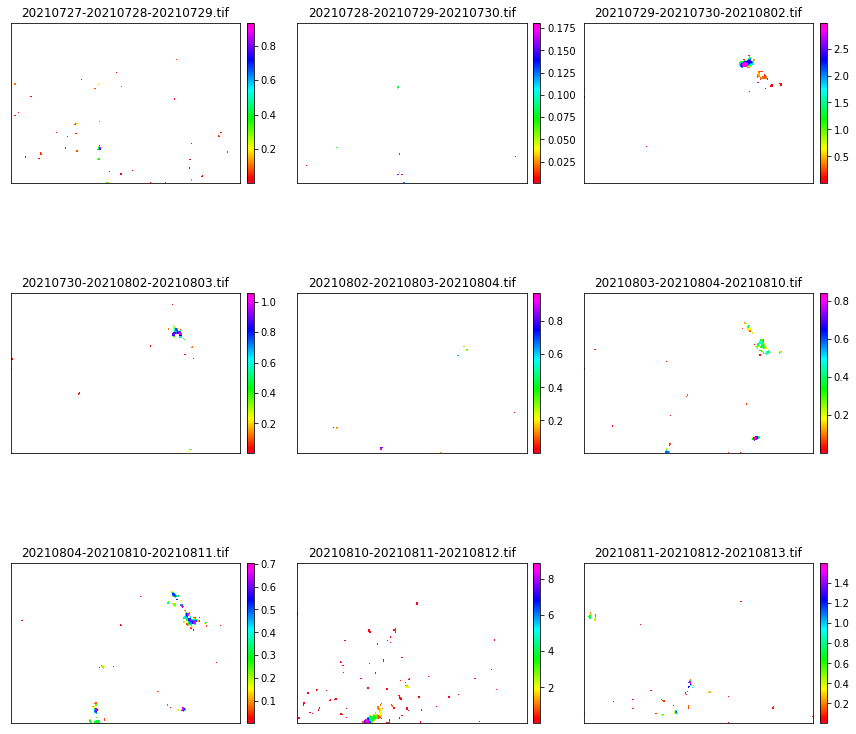

Stacking image flowy folder started
plot stacked flowy data


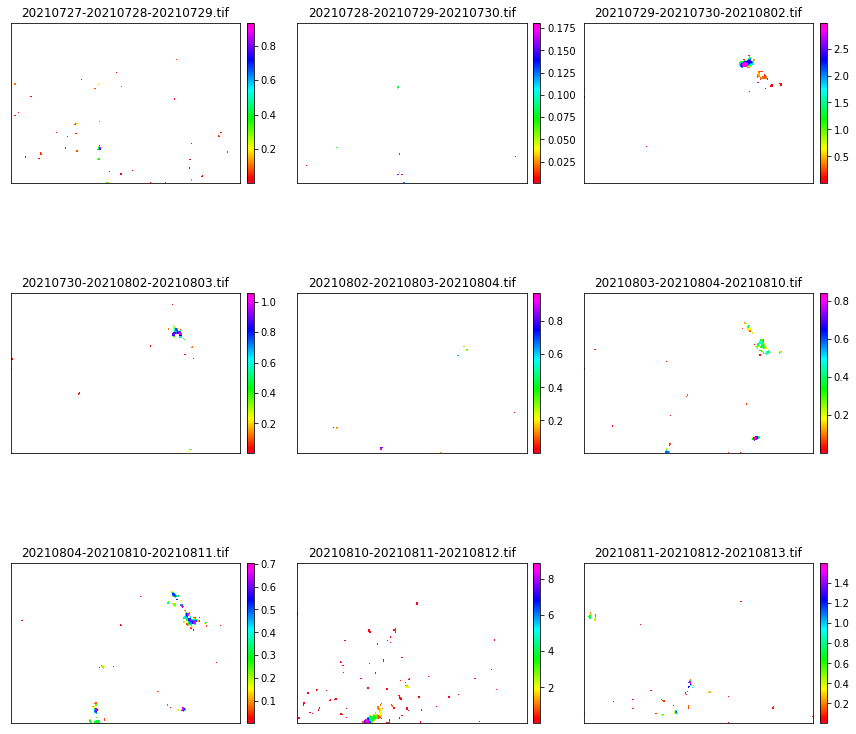

stacked optical velocity from: 20210727 to 20210813
No of Days 17


C:\Users\Mahmud\AppData\Local\Temp\ipykernel_28576\1963350513.py:979: RuntimeWarning: invalid value encountered in true_divide
  v = v_/np.sqrt(u_ **2 + v_ **2);


1 9
processed stack between pairs: 1  to  9
stacked_pairs ['20210727-20210728-20210729.tif', '20210728-20210729-20210730.tif', '20210729-20210730-20210802.tif', '20210730-20210802-20210803.tif', '20210802-20210803-20210804.tif', '20210803-20210804-20210810.tif', '20210804-20210810-20210811.tif', '20210810-20210811-20210812.tif', '20210811-20210812-20210813.tif']


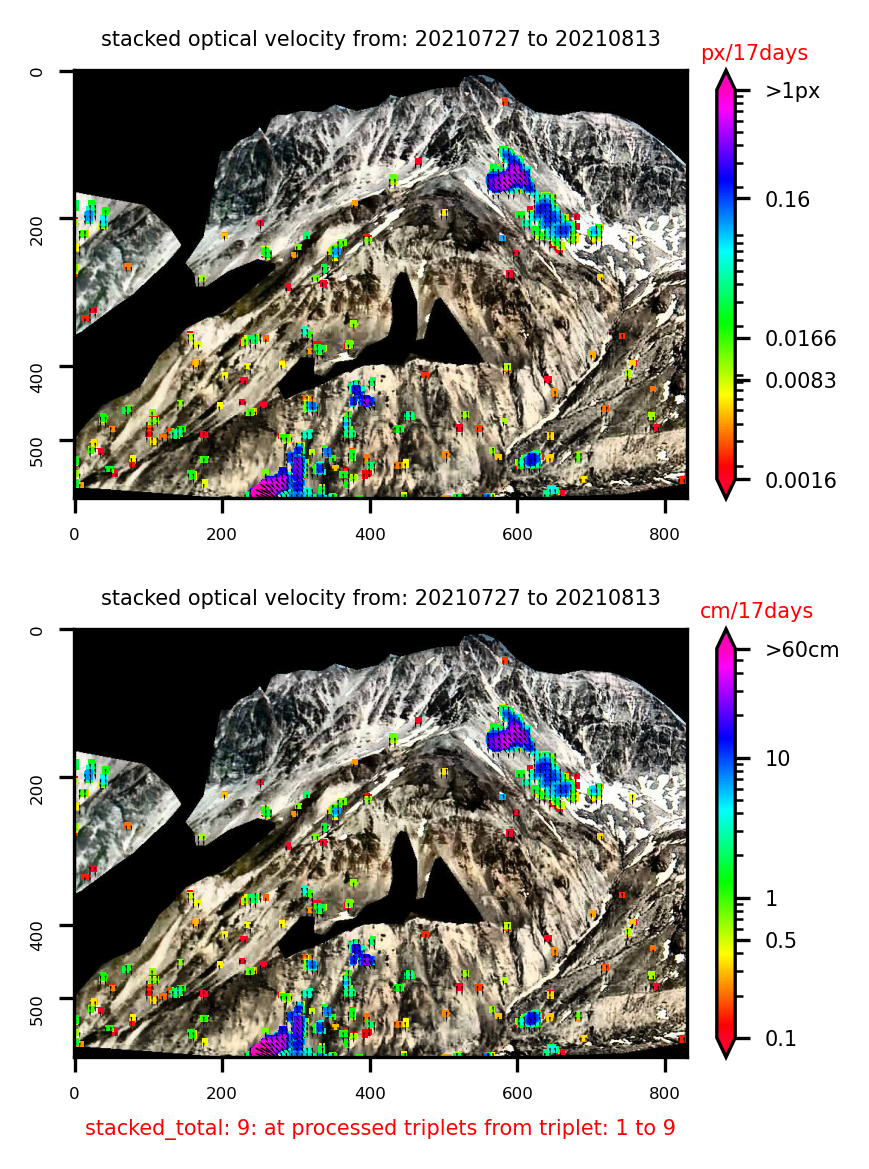

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_28576\1963350513.py", line 1091, in Stack
    canvas.configure(scrollregion=canvas.bbox("all"))
AttributeError: 'FigureCanvasTkAgg' object has no attribute 'configure'


In [12]:
root = Tk()
root.config(bg='lightgray')
root.title("Optical Flow Velocity Application for Slope-Stability Assesment: By Mahmud Muhammad, Simon Fraser University")
root.geometry("1000x500")

frame1 = Frame(root)
frame1.place(x = 0, y = 50) # Position of where you would place your listbox  Top Frame
folderPath = StringVar()
a = Label(frame1 ,text="Choose daily image directory")
a.grid(row=2, column=0)
E = Entry(frame1,textvariable=folderPath)
E.grid(row=2, column=8)
btnFind = ttk.Button(frame1, text="Browse Folder",command=getFolderPath)
btnFind.grid(row=2, column=10)

c = ttk.Button(frame1 ,text="Perform Pre-Processing Filters", command=doStuff)
c.grid(row=2, column=12)
   
########mask window input
w1=StringVar()

wx1=Entry(frame1, textvariable=w1)
wx1.grid(row=2, column=14) 
wx1_label = Label(frame1 ,text="Input X1 Image Coordinate")
wx1_label.grid(row=3, column=14)

w2=StringVar()

wx2=Entry(frame1, textvariable=w2)
wx2.grid(row=2, column=15) 
wx2_label = Label(frame1 ,text="Input X2 Image Coordinate")
wx2_label.grid(row=3, column=15)

h1=StringVar()

hy1=Entry(frame1, textvariable=h1)
hy1.grid(row=4, column=14) 
hy1_label = Label(frame1 ,text="Input Y1 Image Coordinate")
hy1_label.grid(row=5, column=14)

h2=StringVar()

hy2=Entry(frame1, textvariable=h2)
hy2.grid(row=4, column=15) 
hy2_label = Label(frame1 ,text="Input Y2 Image Coordinate")
hy2_label.grid(row=5, column=15)


##########33

a2 = Label(frame1 ,text="Choose filtered/masked image directory")
a2.grid(row=5, column=0)
E2 = Entry(frame1,textvariable=folderPath)
E2.grid(row=5, column=8)
btnFind2 = ttk.Button(frame1, text="Browse Folder",command=getFolderStaticChangeDetection)
btnFind2.grid(row=5, column=10)

c2 = ttk.Button(frame1 ,text="Static Change Detection", command=StaticChangeDetection)
c2.grid(row=5, column=12)


a3 = Label(frame1 ,text="Choose filtered/masked image directory")
a3.grid(row=8, column=0)
E3 = Entry(frame1,textvariable=folderPath)
E3.grid(row=8, column=8)
btnFind3 = ttk.Button(frame1, text="Browse Folder",command=getFolderPath_DynamicChangeDetection)
btnFind3.grid(row=8, column=10)

c3 = ttk.Button(frame1,text="Dynamic Change Detection ", command=DynamicChangeDetection)
c3.grid(row=8, column=12)

####Frame for Image Display
frame2 = Frame(root)
frame2.place(x = 1000, y = 0) # Position of where you would place your listbox


###########3

frame = Frame(root)
frame.place(x = 0, y = 200) # Position of where you would place your listbox


a5_start = Label(frame ,text="Select start date of processed triplet")
a5_start.grid(row=3, column=0)

a5_end = Label(frame ,text="Select end date of processed triplet")
a5_end.grid(row=3, column=10)

c5 = ttk.Button(frame ,text="Stack Optical Velocity Triplets ", command=Stack)
c5.grid(row=20, column=0)


#######33
glistxn = glob( "flow_yn/*.tif")
glistxn.sort(key=os.path.getmtime)
names = [os.path.basename(x) for x in glistxn]

lb = Listbox(frame, width=70, height=6)
lb.grid(row=5, column=0)
scrollbar = Scrollbar(frame, orient="vertical",command=lb.yview)
scrollbar.grid(row=5, column=1)

lb.config(yscrollcommand=scrollbar.set)
for names in (os.path.basename(x) for x in glistxn):
    lb.insert(END, (names))


def my_upd(my_widget):
    my_w = my_widget.widget
    index = int(my_w.curselection()[0])
    value1 = my_w.get(index)
   
    var=(index)
    var1.set(str(var+1)+ ":"+value1[:-22])  
    print ("You selected item ",index, value1)
    # use global variable
    global my_text
     
    # configure
    my_label1.config(text = value1)
    return value1
    
    ####
    

var1=StringVar()
 

textBoxst=Entry(frame, textvariable=var1)
textBoxst.grid(row=2, column=0)

my_label1=Label(frame,text='')
my_label1.grid(row=1, column=0)

lb2 = Listbox(frame, width=70, height=6)
lb2.grid(row=5, column=10)

scrollbar2 = Scrollbar(frame, orient="vertical",command=lb2.yview)
scrollbar2.grid(row=5, column=11)

lb2.config(yscrollcommand=scrollbar.set)
for names in (os.path.basename(x) for x in glistxn):
    lb2.insert(END, (names))
def my_upd2(my_widget):
    my_w = my_widget.widget
    index = int(my_w.curselection()[0])
    value2 = my_w.get(index)
    var=(index)
    var2.set(str(var+1)+ ":"+value2[18:-4])  
    print ("You selected item ",index, value2) 
     # use global variable
    global my_text
     
    # configure
    my_label2.config(text = value2)
    return value2

var2=StringVar()

textBoxend=Entry(frame, textvariable= var2)
textBoxend.grid(row=2, column=10)
my_label2=Label(frame,text='')
my_label2.grid(row=1, column=10)

lb.bind('<<ListboxSelect>>', my_upd)

lb2.bind('<<ListboxSelect>>', my_upd2)

var3=StringVar()

stacked_timetxt=Entry(frame, textvariable=var3)
stacked_timetxt.grid(row=30, column=0) 

stacktime_label = Label(frame ,text="Type total number of days for processed triplets")
stacktime_label.grid(row=35, column=0)
#####################################333333333333333333333333333333333333333333333333333



root.mainloop()